In [ ]:
from tqdm import tqdm
from pathlib import Path
import pandas as pd
import json

with open("outfit_path_list.json", "r") as f :
    outfit_path_list = json.load(f)
with open("top_bottom_path_list.json", "r") as f :
    top_bottom_path_list = json.load(f)

print(len(outfit_path_list))
print(len(top_bottom_path_list))

for p1_p2 in tqdm(top_bottom_path_list) :
    try :
        top_base_path, bottom_base_path = p1_p2.split(",")

        top_garment_split, _, top_garment_id = list(Path(top_base_path).parts)[-3:]
        TOP_PATH = os.path.join(
            "SAMPLE_DATA", top_garment_split, top_garment_id,
            f"{top_garment_id}__00__clo.json"
        )

        bottom_garment_split, _, bottom_garment_id = list(Path(bottom_base_path).parts)[-3:]
        BOTTOM_PATH = os.path.join(
            "SAMPLE_DATA", bottom_garment_split, bottom_garment_id,
            f"{bottom_garment_id}__00__clo.json"
        )

        # top_garment_split, top_garment_id = os.path.basename(TOP_PATH).split("__")[:-1]
        # bottom_garment_split, bottom_garment_id = os.path.basename(BOTTOM_PATH).split("__")[:-1]

        COMBINED_CLO_JSON_PATH = os.path.join(
            "SAMPLE_DATA", top_garment_split, 
            f"{top_garment_id}__00__{bottom_garment_id}__00",
            f"{top_garment_id}__00__{bottom_garment_id}__00__clo.json"
        )
        os.makedirs(os.path.dirname(COMBINED_CLO_JSON_PATH), exist_ok=True)

        with open(TOP_PATH, 'r') as file:
            top_json = json.load(file)

        with open(BOTTOM_PATH, 'r') as file:
            bottom_json = json.load(file)

        combined_clo_json = combine_top_bottom_clo_json(top_json, bottom_json)

        with open(COMBINED_CLO_JSON_PATH, 'w') as file:
            json.dump(combined_clo_json, file, indent=4)
    except Exception as e :
        print(e)
        print(p1_p2)
        print("="*100)
        continue

In [ ]:
import os
import json
import import_api
import utility_api
import fabric_api
import pattern_api
import export_api
import ApiTypes
import time
import os
import glob
import random
# definition
def open_json(path):
    with open(path[0], “r”) as f:
        data = json.load(f)
    return data
def garment_info_json(path):
    with open(path, “r”, encoding=“utf-8”) as file:
        info = json.load(file)
    return info
def seam_taping(stitch_info):
    for value in stitch_info:
        panel_num = value[‘panel’]
        edge_num = value[‘edge’]
        pattern_api.SetPatternPieceSeamtaping(panel_num, edge_num, True)
        pattern_api.SetPatternPieceSametapingWidth(panel_num, edge_num , 2)
def random_fabric_path(fabric_path):
    num1, num2 = random.sample(range(0, len(os.listdir(fabric_path)) - 1), 2)
    fabric_paths = [os.path.join(fabric_path, path) for path in os.listdir(fabric_path)]
    return fabric_paths[num1], fabric_paths[num2]
def adding_outfit_fabric(end_num_index):
    for num in range(0, end_num_index, 1):
        fabric_api.AssignFabricToPattern( 2, num, 2)
        pattern_api.SetArrangementShapeStyle(num, “Flat”)
def adding_top_bottom_fabric(end_num_index, end_num_index_2):
    for num in range(0, end_num_index, 1):
        fabric_api.AssignFabricToPattern( 2, num, 2)
        pattern_api.SetArrangementShapeStyle(num, “Flat”)
#        fabric_api.AssignFabricToPattern( 1, num, 1)
    for second_num in range(end_num_index, end_num_index + end_num_index_2, 1):
        fabric_api.AssignFabricToPattern( 3, second_num, 3)#2)
        pattern_api.SetArrangementShapeStyle(num, “Flat”)
ieo_option = ApiTypes.ImportExportOption()
ieo_option.bExportGarment = True
ieo_option.bExportAvatar = False
ieo_option.bSingleObject = True # single or Multiple
#ieo_option.weldType = WELD_TYPE
ieo_option.bThin = False
ieo_option.bSaveInZip = False
ieo_option.bMetaData = True
# ??? load
TYPE = [“outfit”, “top_bottom”]
#avtfile_path = “/Users/seph/Documents/clo/Assets/Avatar/Avatar/Male_V2/2025_0205_1806jinho.avt”
#avtfile_path = “/Users/seph/Documents/clo/Assets/Avatar/Avatar/Male_V2/2025_0209_jinho_?????????.avt”
#avtfile_path = r”D:\VTO2025\DATASETs\Ours1\CLO_JSON_DATAs\Mia_avt_revise.avt”
#avtfile_path = r”C:\Users\dytpq0916\Desktop\data_dir\174_65_miya_noac.avt”
avtfile_path = r”C:\Users\dytpq0916\Downloads\mia_173_55.avt”
custom_point_path = r”D:/VTO2025/DATASETs/Ours1/CLO_JSON_DATAs/View_Point”
pose_path = r”D:\VTO2025\DATASETs\Ours1\CLO_JSON_DATAs\Pose\A.pos”
DATA_DIR = r”D:\VTO2025\DATASETs\Ours1\CLO_JSON_DATAs”
FABRIC_PATH = r”D:\VTO2025\DATASETs\Ours1\CLO_JSON_DATAs\Filtered_Fabrics”
Garment_info_path = r”D:\VTO2025\DATASETs\Ours1\CLO_JSON_DATAs\info”
pass_garment_list = (“garments_5000_0”,“garments_5000_1",“garments_5000_10”,“garments_5000_11",“garments_5000_12”,“garments_5000_13",“garments_5000_20”,“garments_5000_21",“garments_5000_22")
for type in TYPE:
    DATA_TYPE_DIR = os.path.join(DATA_DIR, f”{type}_CLO_DATASET”) # outfit?? top_bottom?? ??
    for path in os.listdir(DATA_TYPE_DIR):
        # ?? texture root ????
        GARMENT_NUM_DIR = os.path.join(DATA_TYPE_DIR, path) # train test valid
        for garment_num in os.listdir(GARMENT_NUM_DIR):# garment_5000_?
            if garment_num.startswith(pass_garment_list):
                # didn’t need to do anything
                continue
            else:
                GARMENT_RAND_DIR = os.path.join(GARMENT_NUM_DIR, garment_num)
                for garment_dir in os.listdir(GARMENT_RAND_DIR): # rand_????_rand_????
                    GARMENT_DIR = os.path.join(GARMENT_RAND_DIR, garment_dir)
                    garment_dir_id = os.path.basename(GARMENT_DIR)
                    garment_ids = garment_dir_id.split(“_”) # extract top_id, bottom_id
                    top_id, bottom_id = (garment_ids[0]+“_”+garment_ids[1]), (garment_ids[2]+“_”+garment_ids[3])
                    fit_name = top_id + “_” + bottom_id
                    target_top_base_id = top_id
                    target_bottom_base_id = bottom_id
                    info = garment_info_json(os.path.join(Garment_info_path, f”{type}_{path}_transformed_data.json”))
                    combined_list = info[garment_num]
                    if not target_top_base_id == target_bottom_base_id:
                        # {aa}_transformed_data.json #train test valid
                        matching_item = next(
                            (item for item in combined_list
                            if item.get(“top_base_id”) == target_top_base_id and item.get(“bottom_base_id”) == target_bottom_base_id),
                            None
                        )
                        top_panel = matching_item[“top_panel_count”]
                        bottom_panel = matching_item[“bottom_panel_count”]
                        combi_num = 2
                    else:
                        #outfit_{aa}_transformed_data.json #train test valid
                        matching_item = next(
                            (item for item in combined_list
                            if item.get(“outfit_base_id”) == target_top_base_id),
                            None
                        )
                        outfit_panel = matching_item[“outfit_panel_count”]
                        combi_num = 1
                    fabric_path_1, fabric_path_2 = random_fabric_path(FABRIC_PATH)
                    if path.startswith(“.DS_Store”):
                        continue
                    export_zpac = os.path.join(GARMENT_DIR, f”{fit_name}.zpac”)
                    JSON_PATH = glob.glob(os.path.join(GARMENT_DIR, “Clo_Garment_*.json”))
                    STITCH_PATH = glob.glob(os.path.join(GARMENT_DIR, “Clo_Stitch_*.json”))
                    #print(STITCH_PATH)
                    stitch_json = open_json(STITCH_PATH)
                    import_api.ImportFile(avtfile_path)
                    pattern_api.ImportPatternJSON(JSON_PATH[0]) # garment import
                    export_api.ExportZPac(export_zpac)
                    import_api.ImportFile(avtfile_path)
                    import_api.ImportFile(export_zpac)
                #        import_api.ImportFile(export_zpac, add_option)
                    fabric_api.AddFabric(fabric_path_1)
                    fabric_api.AddFabric(fabric_path_2)
                    # ???? fabirc? pattern? ?????
                    if combi_num == 2 :
                        adding_top_bottom_fabric(top_panel, bottom_panel)
                    if combi_num == 1 :
                        adding_outfit_fabric(outfit_panel)
                    else :
                        print(“garment_id_list is not 1 or 2 ????.“)
                    export_api.ExportSnapshot3D(os.path.join(GARMENT_DIR,f”{fit_name}_before_drape.png”))
                    export_api.ExportOBJ(os.path.join(GARMENT_DIR,f”{fit_name}_before_drape.obj”),ieo_option)
                    utility_api.Simulate(200)
                    export_api.ExportSnapshot3D(os.path.join(GARMENT_DIR,f”{fit_name}_after_drape.png”))
                    export_api.ExportOBJ(os.path.join(GARMENT_DIR,f”{fit_name}_after_drape.obj”), ieo_option)
                    utility_api.NewProject()
                    import_api.ImportFile(avtfile_path)
                    import_api.ImportFile(export_zpac)
                    fabric_api.AddFabric(fabric_path_1)
                    fabric_api.AddFabric(fabric_path_2)
                    # ???? fabirc? pattern? ?????
                    if combi_num == 2 :
                        adding_top_bottom_fabric(top_panel, bottom_panel)
                    if combi_num == 1 :
                        adding_outfit_fabric(outfit_panel)
                    else :
                        print(“garment_id_list is not 1 or 2 ????.“)
                    pose = os.path.basename(pose_path)
                    utility_api.Simulate(200)
                    import_api.ImportPose(pose_path)
                    export_api.ExportOBJ(os.path.join(GARMENT_DIR,f”{fit_name}_{pose}_after_pose.obj”),ieo_option)
                    for custom_point in os.listdir(custom_point_path):
                        custom_point_file = os.path.join(custom_point_path, custom_point)
                        import_api.ImportFile(custom_point_file) # view import
                        export_api.ExportRenderingImage(os.path.join(GARMENT_DIR,f”{pose}_{fit_name}_{custom_point}_rendering.png”))
                utility_api.NewProject()

In [14]:
import random

ll = list(range(10))

random.choice(ll)


0

In [ ]:

import os, sys
import json
import time
from glob import glob
import random
import import_api
import utility_api
import fabric_api
import pattern_api
import export_api
import ApiTypes

from pathlib import Path
from dataclasses import dataclass

def get_sort_key(path_str):
    path = Path(path_str)
    # Find the 'garments_5000_X' part
    garment_dir = next(part for part in path.parts if part.startswith('garments_5000_'))
    # Extract the number after 'garments_5000_'
    garment_num = int(garment_dir.split('_')[-1])
    # Get the random ID from the path
    random_id = path.parent.name
    return (garment_num, random_id)

@dataclass
class PathConfig :
    root_path : str = None
    avatar_dir: str = "CLO_ASSETS/AVATARs"
    fabric_dir: str = "CLO_ASSETS/FABRICs"
    pose_dir: str = "CLO_ASSETS/POSEs"
    viewpoint_dir: str = "CLO_ASSETS/VIEWPOINTs"
    
    gcd_dir: str = "GarmentCodeData_v2"

    outfit_metadata_path: str = "outfit_path_list.json"
    combination_metadata_path: str = "top_bottom_path_list.json"
    
    sample_data_dir: str = r"sample_data\sample_data\SAMPLE_DATA"
    
    outfit_path_list: list = None
    combination_path_list: list = None

    def __post_init__(self):
        self.avatar_path_list = sorted(glob(os.path.join(self.root_path, self.avatar_dir, "*.avt")))
        self.fabric_path_list = sorted(glob(os.path.join(self.root_path, self.fabric_dir, "*.zfab")))
        self.pose_path_list = sorted(glob(os.path.join(self.root_path, self.pose_dir, "*.pos")))
        self.viewpoint_path_list = sorted(glob(os.path.join(self.root_path, self.viewpoint_dir, "*.zcmr")))
        
        self.gcd_path_list = sorted(
            glob(os.path.join(
                self.root_path, self.gcd_dir,
                "*", "*", "*config.json"
            )),
            key=get_sort_key
        )
        
        self.sample_data_dir = os.path.join(self.root_path, self.sample_data_dir)
        
        self.outfit_metadata_path = os.path.join(self.root_path, self.outfit_metadata_path)
        self.combination_metadata_path = os.path.join(self.root_path, self.combination_metadata_path)

        with open(self.outfit_metadata_path, "r") as f:
            self.outfit_metadata = json.load(f)
        self.outfit_path_list = []
        for outfit in self.outfit_metadata:
            garment_split, _, garment_id = list(Path(outfit).parts)[-3:]
            
            self.outfit_path_list.append(os.path.join(
                self.sample_data_dir, garment_split, garment_id,
                f"{garment_id}__00__clo.json"
            ))

        with open(self.combination_metadata_path, "r") as f:
            self.combination_metadata_raw = json.load(f)
        self.combination_path_list = []
        for combination in self.combination_metadata_raw:
            top_base_path, bottom_base_path = combination.split(",")
            top_garment_split, _, top_garment_id = list(Path(top_base_path).parts)[-3:]
            bottom_garment_split, _, bottom_garment_id = list(Path(bottom_base_path).parts)[-3:]
            self.combination_path_list.append(os.path.join(
                self.sample_data_dir, top_garment_split,
                f"{top_garment_id}__00__{bottom_garment_id}__00",
                f"{top_garment_id}__00__{bottom_garment_id}__00__clo.json"
            ))
            
    @property
    def avatar_count(self) -> int:
        return len(self.avatar_path_list)

    @property
    def fabric_count(self) -> int:
        return len(self.fabric_path_list)
        
    @property
    def pose_count(self) -> int:
        return len(self.pose_path_list)
    
    @property
    def viewpoint_count(self) -> int:
        return len(self.viewpoint_path_list)

    @property
    def gcd_count(self) -> int:
        return len(self.gcd_path_list)
    


@dataclass
class GarmentScene :
    is_combination: bool = False
    garment_json_path: str = None
    avatar_path: str = None
    whole_fabric_path_list: str = None
    fabric_path_list: list = None
    panel_count_list: list = None
    pose_path:str = None
    viewpoint_path_list: list = None
    
    def __post_init__(self):
        # identify if scene is composed of single or multiple garments
        if len(os.path.basename(self.garment_json_path).split("__")) == 3:
            self.is_combination = False
        elif len(os.path.basename(self.garment_json_path).split("__")) == 5:
            self.is_combination = True
        else :
            raise ValueError(f"Invalid garment json path: {self.garment_json_path}")
        
        self.panel_count_list, self.prev_fabric_count = self.get_panel_fabric_count_list()
        self.fabric_path_list = list(map(
            lambda x : random.choice(self.whole_fabric_path_list),
            self.panel_count_list
        ))
        
        self.output_dir = os.path.dirname(self.garment_json_path)
        
    def get_panel_fabric_count_list(self) :
        with open(self.garment_json_path, "r") as f:
            json_data = json.load(f)
            
        panel_count_list = []
        cur_garment_id = None
        for pattern in json_data["PatternList"] :
            garment_id = pattern["ID"].split("_")[1]
            
            if garment_id == cur_garment_id :
                panel_count_list[-1] += 1
            else :
                cur_garment_id = garment_id
                panel_count_list.append(1)
            
        return panel_count_list, len(json_data["FabricList"])
             
    def import_scene(
        self, option = None,
        SIM_STEP = 200
    ) :
        '''
        import to clo
        '''
        utility_api.NewProject()
        
        if option is None :
            option = ApiTypes.ImportExportOption()
            option.bExportGarment = True
            option.bExportAvatar = False
            option.bSingleObject = True
            option.bThin = False
            option.bSaveInZip = False
            option.bMetaData = True
        
        
        import_api.ImportFile(self.avatar_path)
        pattern_api.ImportPatternJSON(self.garment_json_path)
        for fabric_path in self.fabric_path_list :
            fabric_api.AddFabric(fabric_path)
        
        fabric_idx = fabric_api.GetFabricCount(-2) - len(self.fabric_path_list)
        colorway_idx = fabric_idx
        panel_idx = 0
        for fabric_path, panel_count in zip(self.fabric_path_list, self.panel_count_list) :
            for _ in range(panel_count) :
                
                fabric_api.AssignFabricToPattern(fabric_idx, panel_idx, colorway_idx)
                pattern_api.SetArrangementShapeStyle(panel_idx, "Flat")
                panel_idx += 1
            fabric_idx += 1
    
    
        export_api.ExportZPac(      os.path.join(self.output_dir, "pre_drape.zpac"))
        
        return
    
        export_api.ExportSnapshot3D(os.path.join(self.output_dir, "pre_drape.png"))
        # export_api.ExportOBJ(       os.path.join(self.output_dir, "pre_drape.obj"))
        import_api.ImportFile(      os.path.join(self.output_dir, "pre_drape.zpac"))
        
        
        utility_api.Simulate(SIM_STEP)
        
        import_api.ImportPose(self.pose_path)
        pose_name = os.path.basename(self.pose_path).split(".")[0]
        export_api.ExportOBJ(os.path.join(self.output_dir, f"{pose_name}.obj"), option)
        
        for viewpoint in self.viewpoint_path_list :
            view_name = os.path.basename(viewpoint).split(".")[0]
            import_api.ImportFile(viewpoint)
            export_api.ExportRenderingImage(os.path.join(self.output_dir, f"{view_name}.png"))
                
SYSTEM_CONFIG_DICT = {
    "HJP_WINDOWS_DESKTOP": {
        "CLO_DIR": "E:/HJP/KUAICV/VTO/DATA/CLO",
    }
}

system_name = "HJP_WINDOWS_DESKTOP"

path_config = PathConfig(root_path=SYSTEM_CONFIG_DICT[system_name]["CLO_DIR"])

garment_path_list = [
    r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\rand_J1VCZTKDYF__00__rand_IYHQZUP5DB__00__clo.json"
]
garment_path_list = path_config.combination_path_list
garment_path_list = path_config.outfit_path_list

for idx, garment_config_json_path in enumerate(garment_path_list) :

    # garment_config_json_path = path_config.combination_path_list[0]
    # print('-'*50)
    # print(idx)
    # print(garment_config_json_path)
    # print('-'*50)


    garment_scene = GarmentScene(
        garment_json_path=garment_config_json_path,
        avatar_path=path_config.avatar_path_list[0],
        whole_fabric_path_list=path_config.fabric_path_list,
        pose_path=path_config.pose_path_list[0],
        viewpoint_path_list=path_config.viewpoint_path_list
    )

    garment_scene.import_scene()


In [173]:
os.path.exists(
    r'E:/HJP/KUAICV/VTO/DATA/CLO\sample_data\sample_data\SAMPLE_DATA\garments_5000_0\rand_NF3KKDJQX4__00__rand_2YV0SWYVC9__00\rand_NF3KKDJQX4__00__rand_2YV0SWYVC9__00__clo.json'
)

True

In [223]:

import os, sys
import json
from pathlib import Path

with open("top_bottom_path_list.json", "r") as f :
    top_bottom_path_list = json.load(f)

completed_comb_path_list = []
for idx, raw_comb in enumerate(top_bottom_path_list) :
    top_base_path, bottom_base_path = raw_comb.split(",")
    top_garment_split, _, top_garment_id = list(Path(top_base_path).parts)[-3:]
    bottom_garment_split, _, bottom_garment_id = list(Path(bottom_base_path).parts)[-3:]
    
    # print(top_garment_split)
    # print(bottom_garment_split)
    # print(top_garment_id)
    # print(bottom_garment_id)
    # print("="*100)

    saved_dir = os.path.join(
        r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\sample_data\SAMPLE_DATA",
        top_garment_split,
        f"{top_garment_id}__00__{bottom_garment_id}__00"
    )
    # print(saved_dir)
    # print(os.path.exists(saved_dir))
    # print(os.listdir(saved_dir))
    
    # print(idx, '\t', len(os.listdir(saved_dir)) > 1, '\t', saved_dir)
    
    if len(os.listdir(saved_dir)) > 1 :
        completed_comb_path_list.append(raw_comb)

print(len(completed_comb_path_list))

1693


In [224]:

import os, sys
import json
from pathlib import Path

with open("outfit_path_list.json", "r") as f :
    outfit_path_list = json.load(f)

completed_outfit_path_list = []
for idx, raw_outfit in enumerate(outfit_path_list) :
    base_path = raw_outfit
    
    garment_split, _, garment_id = list(Path(base_path).parts)[-3:]
    
    saved_dir = os.path.join(
        r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\sample_data\SAMPLE_DATA",
        garment_split,
        f"{garment_id}"
    )
    
    
    # print(saved_dir)
    # print(os.path.exists(saved_dir))
    # print(os.listdir(saved_dir))
    
    # print(idx, '\t', len(os.listdir(saved_dir)) > 1, '\t', saved_dir)
    
    if len(os.listdir(saved_dir)) > 2 :
        completed_outfit_path_list.append(raw_outfit)

print(len(completed_outfit_path_list))

2000


In [164]:
base_path = outfit_path_list[359]
garment_split, _, garment_id = list(Path(base_path).parts)[-3:]

saved_dir = os.path.join(
    r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA",
    garment_split,
    f"{garment_id}"
)

os.path.exists(saved_dir)


True

In [165]:
saved_dir

'E:\\HJP\\KUAICV\\VTO\\DATA\\CLO\\sample_data\\SAMPLE_DATA\\garments_5000_2\\rand_V10NQ9AZSP'

## Check If every json is valid

In [167]:

import os, sys
import json
from pathlib import Path

with open("outfit_path_list.json", "r") as f :
    outfit_path_list = json.load(f)

valid_outfit_count = 0
completed_outfit_path_list = []
for idx, raw_outfit in enumerate(outfit_path_list) :
    base_path = raw_outfit
    
    garment_split, _, garment_id = list(Path(base_path).parts)[-3:]
    
    saved_dir = os.path.join(
        r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA",
        garment_split,
        f"{garment_id}"
    )
    
    clo_json_path = os.path.join(
        saved_dir,
        f"{garment_id}__00__clo.json"
    )
    
    try :
        with open(clo_json_path, "r") as f :
            clo_json = json.load(f)
            
        valid_outfit_count += 1
    except :
        
        print("Invalid json:")
        print(base_path)
        print(clo_json_path)


Invalid json:
garments_5000_2/default_body/rand_V10NQ9AZSP
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_V10NQ9AZSP\rand_V10NQ9AZSP__00__clo.json
Invalid json:
garments_5000_2/default_body/rand_EWLQX494AA
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_EWLQX494AA\rand_EWLQX494AA__00__clo.json
Invalid json:
garments_5000_2/default_body/rand_LSU6QV6RK7
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_LSU6QV6RK7\rand_LSU6QV6RK7__00__clo.json
Invalid json:
garments_5000_2/default_body/rand_D5POSEMP1V
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_D5POSEMP1V\rand_D5POSEMP1V__00__clo.json
Invalid json:
garments_5000_2/default_body/rand_5Z39T457A8
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_5Z39T457A8\rand_5Z39T457A8__00__clo.json
Invalid json:
garments_5000_2/default_body/rand_0QD4D0GZ76
E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_2\rand_0QD4D0GZ7

In [168]:
valid_outfit_count

730

In [169]:
len(outfit_path_list)

6275

0
rand_J1VCZTKDYF_right_sleeve_b


ValueError: Unrecognized linestyle: '->'

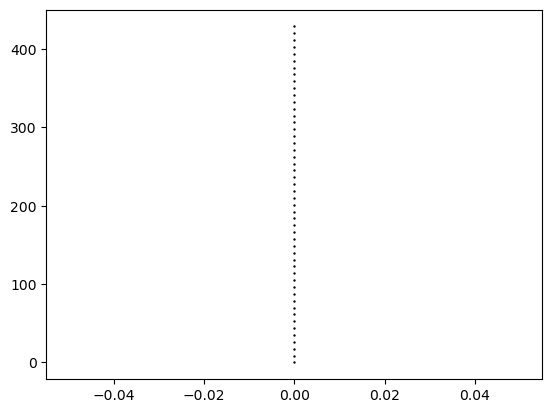

In [123]:
clo_json_dir = r"E:\HJP\KUAICV\VTO\DATA\CLO\sample_data\SAMPLE_DATA\garments_5000_0\rand_J1VCZTKDYF__00__rand_IYHQZUP5DB__00"
clo_json_path = os.path.join(
    clo_json_dir,
    f"{os.path.basename(clo_json_dir)}__clo.json"
)

with open(clo_json_path, "r") as f :
    clo_json = json.load(f)

for PANEL_IDX in range(len(clo_json["PatternList"])) :
    
    print(PANEL_IDX)
    print(clo_json["PatternList"][PANEL_IDX]["Name"])
    
    svg_path = []
    for line in clo_json["PatternList"][PANEL_IDX]["ShapeInfo"]["LineList"] :
        point_type_list = list(map(
            lambda point : point["PointType"],
            line["PointList"]
        ))
            
        point_arr = np.array(list(map(
            lambda point : [point["Position"]["x"], point["Position"]["y"]],
            line["PointList"]
        )))
        
        if len(point_type_list) == 2 :
            svg_path.append(svgpath.Line(point_arr[0],point_arr[1]))
            
        elif len(point_type_list) == 4 :
            svg_path.append(svgpath.CubicBezier(point_arr[0],point_arr[1],point_arr[2],point_arr[3]))
    
    panel = SVGPanel(svg_path)
    
    N_SAMPLE_PER_EDGE = 50
    t_arr = np.linspace(0, 1, N_SAMPLE_PER_EDGE)
    for edge in panel.svg_path :
        
        edge_point_arr = np.array(list(map(
            lambda t : edge.point(t),
            t_arr
        )))
        
        plt.scatter(
            edge_point_arr[:, 0],
            edge_point_arr[:, 1],
            s = 0.5,
            color = "black"
        )
        plt.arrow(
            *edge.point(0),
            *(edge.point(1) - edge.point(0)),
            color = "red",
            linewidth = 0.5,
            linestyle = "",
            head_width = 3,
            head_length = 3
        )
        
        
    plt.axis("equal")
    plt.show()